In [1]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py



# 이분법<br>Bisection Method



[![Approximating square roots to hundredths | Pre-Algebra | Khan Academy](https://i.ytimg.com/vi/EFVrAk61xjE/hqdefault.jpg)](https://www.youtube.com/watch?v=EFVrAk61xjE)



## 배경<br>Background



다시 10의 제곱근을 구한다고 생각해 보자.<br>Again, let's try to find the square root of 10.



$$
f(x)=x^2-10 = 0
$$



In [2]:
# 이 함수를 0으로 만드는 x 를 찾고자 함
# Intend to find x making the function below zero
def f(x):
    return x ** 2 - 10



그림의 매개변수는 다음과 같이 정하자.<br>
Let's assume plot parameters as follows.



In [3]:
# x 의 범위와 간격을 지정 
# Specify range and interval of x
x_start = 0
x_end = 6
x_interval = 0.5



함수를 한번 표시해 보자.<br>
Let's visualize the function.



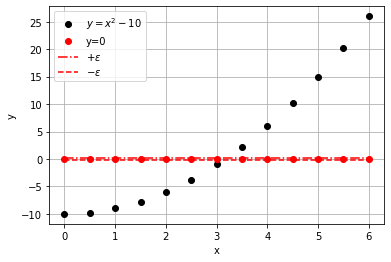

In [4]:
import plot_root_finding

plot_root_finding.plot(f, x_start, x_end, x_interval);



함수 $f(x) = x^2-10$은 구간 $0 \le x \le 6$ 에서 연속이고 부호가 최소한 한번 바뀐다.<br>
Function $f(x) = x^2-10$ is continuous within $0 \le x \le 6$ and changes its sign at least once.



이는 구간 $0 \le x \le 6$ 에서 최소한 한 $x$ 값은 $f(x)=0$ 을 만족한다는 것을 뜻한다. 이런 $x$ 가 우리가 찾고 싶어 햐는 $f(x)$의 근이다.<br>
This means that there is at least one $x$ satisfying $f(x)=0$. Such $x$ would be the root of $f(x)$ that we would like to find.



## 이분법<br>Bisection Method



이분법은 처음에는 $x=0$, $x=6$ 두 점에서 출발한다.<br>
The algorithm starts at the two points of $x=0$ and $x=6$.



array([0., 6.])

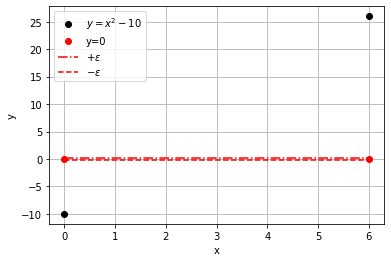

In [5]:
py.clf()
plot_root_finding.plot(f, 0, 6)



이분법은 이 $0 \le x \le 6$ 구간을 $0 \le x \le 3$, $3 \le x \le 6$ 두 구간으로 나눈다.<br>
Bisection method divides this $0 \le x \le 6$ interval into $0 \le x \le 3$ and  $3 \le x \le 6$ intervals.



array([3., 6.])

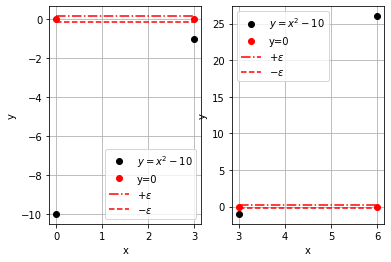

In [6]:
py.clf()

py.subplot(1, 2, 1)
plot_root_finding.plot(f, 0, 3)

py.subplot(1, 2, 2)
plot_root_finding.plot(f, 3, 6)



$0 \le x \le 3$ 구간에서는 $f(x)$의 부호가 바뀌지 않았지만, $3 \le x \le 6$ 구간에서는 변했다.<br>
Within the $0 \le x \le 3$ interval, $f(x)$ did not change its sign but did in $3 \le x \le 6$ interval.



$0 \le x \le 3$ 구간에는 $f(x)$의 근이 없을 듯 싶지만, $3 \le x \le 6$ 구간에는 반드시 있을 것이다.<br>
Within the $0 \le x \le 3$ interval, $f(x)$ may not have a root but would in $3 \le x \le 6$ interval.



이제는 $3 \le x \le 6$ 구간만 검토한다.<br>Now we would evaluate interval $3 \le x \le 6$ only.



array([3., 6.])

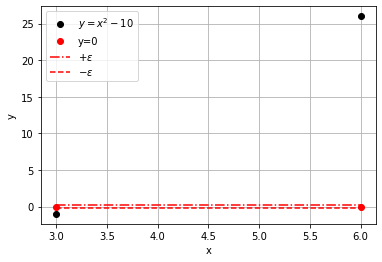

In [7]:
py.clf()
plot_root_finding.plot(f, 3, 6)



다시 $3 \le x \le 6$ 구간을 $3 \le x \le 4.5$, $4.5 \le x \le 6$ 두 구간으로 나누자.<br>
Again, let's divide this $3 \le x \le 6$ interval into $3 \le x \le 4.5$ and  $4.5 \le x \le 6$ intervals.



array([4.5, 6. ])

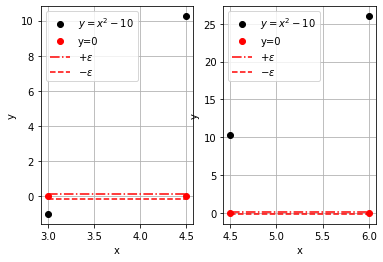

In [8]:
py.clf()

py.subplot(1, 2, 1)
plot_root_finding.plot(f, 3, 4.5)

py.subplot(1, 2, 2)
plot_root_finding.plot(f, 4.5, 6)



이번에는 $3 \le x \le 4.5$ 구간에서 부호가 바뀌었다.<br>
This time, the sign changed within the $3 \le x \le 4.5$ interval.



array([3. , 4.5])

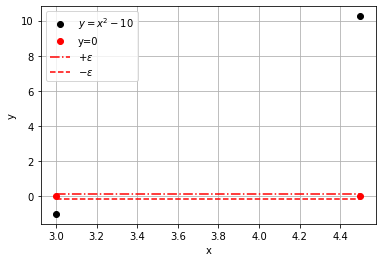

In [10]:
py.clf()
plot_root_finding.plot(f, 3, 4.5)



이분법은 이렇게 근사해의 정밀도를 원하는 수준에 이를 때 까지 반복하는 것이다.<br>
The bisection method iterates this way until the precision of the approximate root reaches the desirable level.



### 이분법 구현<br>Implementing Bisection Method



아래 python 프로그램은 이분법으로 $\sqrt{10}$을 계산한다<br>Following python script calculates $\sqrt{10}$ using bisection method.



#### 문제 정의<br>Problem definition



In [11]:
# 이 함수를 0으로 만드는 x 를 찾고 싶음
# Want to find x making this function zero
def f(x):
    return x ** 2 - 10



#### 매개변수<br>Parameters



In [12]:
# y_i 의 절대값이 이 값 보다 작으면 y_i = 0으로 본다
# If absolute value of y_i is smaller than this, we would think y_i = 0.
epsilon = 1e-3

# 매개변수
# Parameters
# 초기 구간의 하한
# Lower end of the interval
x_lower = 0
# 초기 구간의 상한
# Upper end of the interval
x_upper = 6



#### 함수로 구현된 이분법<br>Bisection method implementation in a function



In [13]:
def bisection(f, x_lower, x_upper, epsilon):
    """
    이분법
    Bisection Method
    
    f : f(x) = 0 을 만족하는 x 를 찾고자 하는 함수 Function that we want to find x satisfying f(x) = 0
    x_lower : 초기 구간의 하한 Lower end of the initial interval
    x_upper : 초기 구간의 상한 Upper end of the initial interval
    epsilon : 희망하는 근의 정밀도 Desirable precision of the root
    """

    counter = 0
    
    # 간격이 epsilon 보다 더 길다면 계속 반복
    # Iterate while the interval is longer than epsilon
    while abs(x_upper - x_lower) > epsilon:
        # 구간을 둘로 나누는 x 를 계산
        # Calculate x bisecting the interval
        x_new = (x_upper + x_lower) * 0.5
        
        counter += 1
        
        # x_new 와 x_upper 사이에서 f(x)의 부호가 바뀐다면
        # If f(x)'s sign changes between x_new and x_upper
        if 0 > (f(x_upper) * f(x_new)):
            # 구간의 하한을 변경
            # Change the lower end of the interval
            x_lower = x_new

        # 그렇지 않고 x_lower 와 x_new 사이에서 f(x)의 부호가 바뀐다면
        # Else if f(x)'s sign changes between x_lower and x_new
        elif 0 > (f(x_lower) * f(x_new)):
            # 구간의 상한을 변경
            # Change the upper end of the interval
            x_upper = x_new

        # 둘 다 아니라면
        # If none of above
        else:
            # 무언가 잘못된 것으로 보임
            # Seems something is not right

            f_x_lower=f(x_lower)
            f_x_upper=f(x_upper)

            # 예외를 발생 시킴
            # Raise an exception
            raise ValueError(f'Something is not right:\nf({x_lower}) = {f_x_lower}\n'
                             f'f({x_upper}) = {f_x_upper}'
            )

    print('counter =', counter)
            
    return x_new



#### 적용<br>Application



In [14]:
%time sqrt_10 = bisection(f, 0, 6, epsilon)



counter = 13
Wall time: 0 ns


이분법으로 찾은 10의 제곱근<br>
Square root of 10 that we just found using the bisection method



In [15]:
print('sqrt_10 =', sqrt_10)



sqrt_10 = 3.161865234375


아래 연산의 결과는 0인가?<br>
Is the result of the following calculation zero?



In [16]:
print('sqrt_10 ** 2 - 10 =', sqrt_10 ** 2 - 10)



sqrt_10 ** 2 - 10 = -0.0026082396507263184


초기 구간이 잘못되었다면?<br>What if initial interval is not correct?



In [17]:
# 해당 코드에서 예외(오류)가 발생할 경우 except 문 아래의 처리 절차를 실행
# In this code block, if an exception occurs, run exception handling lines under except
try:
    # 아래 행은 오류를 발생시킬 것임
    # This will fail
    sqrt_10_not_here = bisection(f, 6, 10, epsilon) 
except ValueError as e:
    print(e)



Something is not right:
f(6) = 26
f(10) = 90


도전 과제 1: 이분법의 두 초기값을 정하는 방법을 제안하시오.<br>Try this 1: Propose a method to decide two initial values for the bisection method.



도전 과제 2: $sin^2(\theta)=0.5$ 인 $\theta^{\circ}$를 $0^{\circ}$ ~ $90^{\circ}$도 범위 안에서 구해 보시오.<br>Try this 2: Find $\theta^{\circ}$ satisfying $sin^2(\theta)=0.5$ in $0^{\circ}$ ~ $90^{\circ}$ interval.



## 사이파이 구현<br>Implementation in SciPy



사이파이 모듈도 [`bisection`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html) 함수를 포함하고 있음.<br>
The SciPy module also has the [`bisection`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html) function.



In [ ]:
import scipy.optimize as so

sqrt_10_scipy = so.bisect(f, 0, 6, xtol=epsilon)



In [ ]:
sqrt_10_scipy



위에서 구한 결과와 비교<br>Compare with the value above



In [ ]:
sqrt_10



해의 오차 확인<br>Check solution



In [ ]:
assert abs(sqrt_10_scipy - (10**0.5)) < epsilon, abs(sqrt_10_scipy - (10**0.5))



## Final Bell<br>마지막 종



In [ ]:
# stackoverfow.com/a/24634221
import os
os.system("printf '\a'")

